# **Used Car Retail Price Recommendation**
----
**Final Capstone Project - Dibimbing Machine Learning Batch 3**

**by Reinhard Jonathan Silalahi**

### **Requirement installation**

In [1]:
# !pip install -r requirements.txt

### **Connect to PostgreSQL Database and Load Data**

In [2]:
from sqlalchemy import create_engine
import pandas as pd

# Define the database connection parameters
username = 'postgres'
password = 'password'
host = 'localhost'
port = '5432'  # Default PostgreSQL port
database = 'db_scrapper'

# Create the database connection
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

# Query to get the data
query = '''
select 
	brand.name as brand, 
	model.name as model, 
	type.name as type, 
	color.name as color,
	year, 
	mileage, 
	transmission, 
	engine_capacity, 
	condition,
    price,
	province, 
	region,
    scrapper.data_source
from scrapper
join brand on scrapper.brand_id = brand.id
join model on scrapper.model_id = model.id
join type on scrapper.type_id = type.id
join color on scrapper.color_id = color.id
'''

# Load data into a DataFrame
df = pd.read_sql(query, engine)

# Close the connection (if necessary)
engine.dispose()

In [3]:
# Display basic information
print(df.info())

# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886824 entries, 0 to 886823
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   brand            886824 non-null  object 
 1   model            886824 non-null  object 
 2   type             886824 non-null  object 
 3   color            886824 non-null  object 
 4   year             886824 non-null  int64  
 5   mileage          886824 non-null  int64  
 6   transmission     886824 non-null  object 
 7   engine_capacity  886824 non-null  int64  
 8   condition        886824 non-null  object 
 9   price            886824 non-null  float64
 10  province         886709 non-null  object 
 11  region           886824 non-null  object 
 12  data_source      886824 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 88.0+ MB
None
    brand  model                type    color  year  mileage transmission  \
0   Honda  Freed               1.5 E   

### **Data sources**

In [4]:
unique_values = df['data_source'].unique()
print(f"Data sources: {unique_values}")

Data sources: ['OLX' 'CARMUDI']


### **Handling Missing Value**

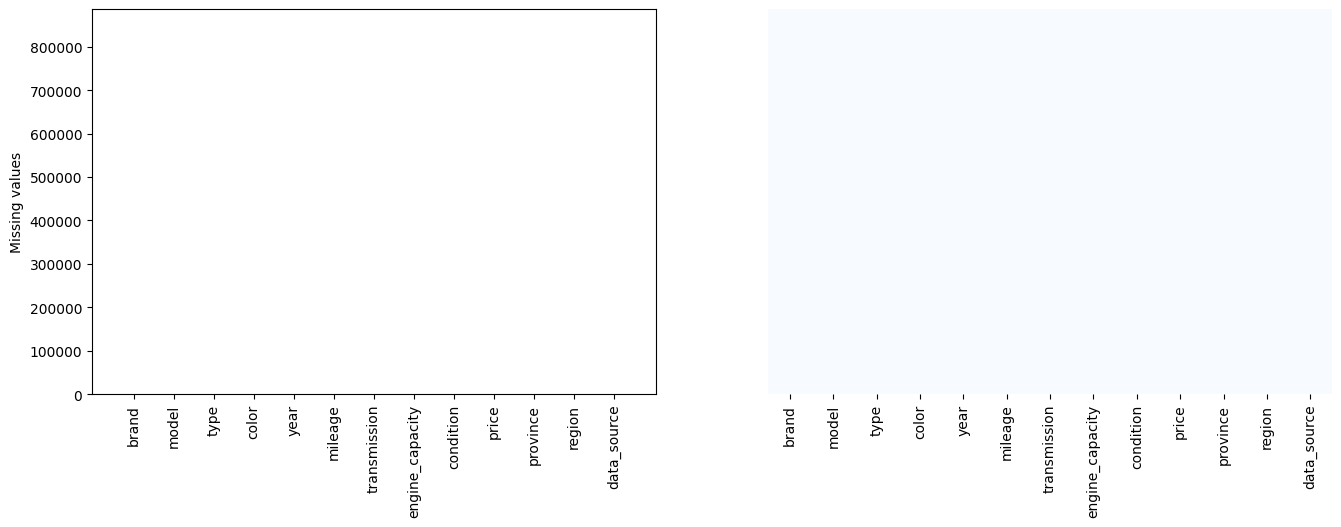

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Let's visualize the missing data
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)

#second plot, heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

In [6]:
df.dropna()

,brand,model,type,color,year,mileage,transmission,engine_capacity,condition,price,province,region,data_source
0,Honda,Freed,1.5 E,Hitam,2012,90000,AUTOMATIC,0,USED_CAR,165000000.0,Jawa Barat,Indonesia,OLX
1,Toyota,Agya,1.0 G TRD SPORTIVO,Abu-abu,2014,110000,AUTOMATIC,0,USED_CAR,95000000.0,Jawa Timur,Indonesia,OLX
2,Honda,Freed,1.5 E,Silver,2009,125000,AUTOMATIC,0,USED_CAR,129000000.0,Jawa Timur,Indonesia,OLX
3,Honda,Freed,1.5 A,Silver,2012,100000,AUTOMATIC,0,USED_CAR,155000000.0,Jawa Timur,Indonesia,OLX
4,Honda,Freed,1.5 S,Silver,2014,65000,AUTOMATIC,0,USED_CAR,164000000.0,Jakarta D.K.I.,Indonesia,OLX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886819,Honda,Freed,1.5 S,Silver,2012,55000,AUTOMATIC,0,USED_CAR,142000000.0,Jakarta D.K.I.,Indonesia,OLX
886820,Nissan,Grand livina,1.5 SV FACELIFT,Silver,2017,35000,MANUAL,0,USED_CAR,133000000.0,Jawa Timur,Indonesia,OLX
886821,Honda,Freed,1.5 E,Silver,2009,130000,AUTOMATIC,0,USED_CAR,121500000.0,Jakarta D.K.I.,Indonesia,OLX
886822,Honda,Freed,1.5 E,Silver,2012,95000,AUTOMATIC,0,USED_CAR,160000000.0,Jawa Barat,Indonesia,OLX


In [7]:
contains_zero = (df['engine_capacity'] == 0).any()

print(contains_zero)

if contains_zero:
    print("The 'engine_capacity' column contains zero values.")
    
    # Calculate the number of zero values
    zero_count = (df['engine_capacity'] == 0).sum()
    
    print(f"Number of zero values in 'engine_capacity': {zero_count}")
    
    # Calculate the percentage of zero values
    zero_percentage = (zero_count / len(df)) * 100
    
    print(f"Percentage of zero values: {zero_percentage:.2f}%")
else:
    print("The 'engine_capacity' column does not contain any zero values.")

True
The 'engine_capacity' column contains zero values.
Number of zero values in 'engine_capacity': 880431
Percentage of zero values: 99.28%


**Because zero missing value on 'engine_capacity' percentage is more than 20%, then drop it**

In [8]:
if 'engine_capacity' in df.columns:
    df = df.drop(columns=['engine_capacity'])
    print(f"Column '{'engine_capacity'}' has been dropped.")

Column 'engine_capacity' has been dropped.


### **Remove Duplicates**

In [9]:
print("Count before removing duplicate rows: ", df.shape)
beforeDuplicatesDrop = df.duplicated().sum()
print("Total duplicate rows: ", beforeDuplicatesDrop)

df = df.drop_duplicates()
print("Count after removing duplicate rows: ", df.shape)

Count before removing duplicate rows:  (886824, 12)
Total duplicate rows:  167076
Count after removing duplicate rows:  (719748, 12)


### **Fix wrong condition type, based on the mileage**

In [10]:
count = ((df['mileage'] != 0) & (df['condition'] == 'NEW_CAR')).sum()

print(f"Number of rows where mileage != 0 and condition is NEW_CAR: {count}")

Number of rows where mileage != 0 and condition is NEW_CAR: 484


In [11]:
# Update car_type to 'USED_CAR' for non-zero mileage
df.loc[df['mileage'] > 0, 'condition'] = 'USED_CAR'

In [12]:
count = ((df['mileage'] == 0) & (df['condition'] == 'USED_CAR')).sum()

print(f"Number of rows where mileage == 0 and condition is USED_CAR: {count}")

Number of rows where mileage == 0 and condition is USED_CAR: 74


In [13]:
# Update car_type to 'NEW_CAR' for zero mileage
df.loc[df['mileage'] == 0, 'condition'] = 'NEW_CAR'

In [14]:
count = ((df['mileage'] != 0) & (df['condition'] == 'NEW_CAR')).sum()
print(f"Number of rows where mileage != 0 and condition is NEW_CAR: {count}")

count = ((df['mileage'] == 0) & (df['condition'] == 'USED_CAR')).sum()
print(f"Number of rows where mileage == 0 and condition is USED_CAR: {count}")

Number of rows where mileage != 0 and condition is NEW_CAR: 0
Number of rows where mileage == 0 and condition is USED_CAR: 0


### **Encoding**

In [15]:
import datetime
from sklearn.preprocessing import LabelEncoder

# Calculate age from the year
df['age'] = datetime.datetime.now().year - df['year']

# Backup the original name value of categorical columns
# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
categorical_columns = ['brand', 'model', 'type', 'color', 'transmission', 'condition', 'province', 'region']
for column in categorical_columns:
    df[column + '_name'] = df[column]

    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string to handle any non-numeric values
    label_encoders[column] = le

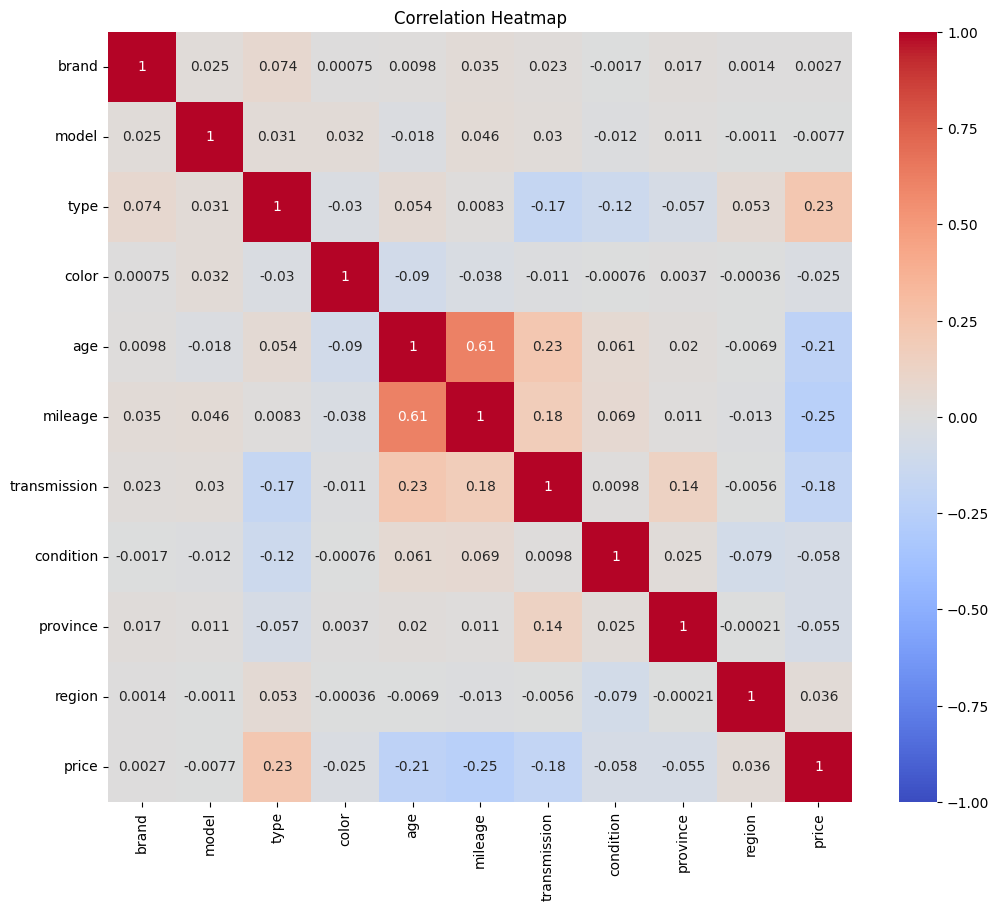

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
correlation_matrix = df[['brand', 'model', 'type', 'color', 'age', 'mileage', 'transmission', 'condition', 'province', 'region', 'price']].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

### **Handling Outliers**

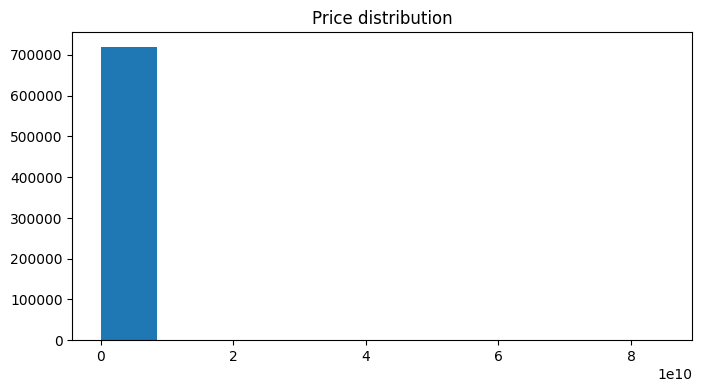

In [17]:
#check the price column for outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.hist()
plt.title('Price distribution')
plt.grid(False)

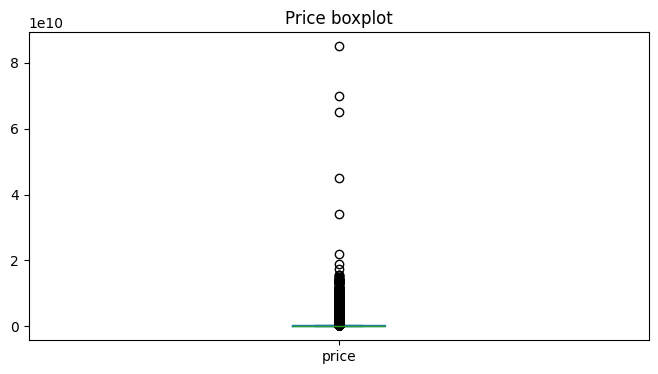

In [18]:
#use boxplots to find outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.title('Price boxplot')
plt.grid(False)

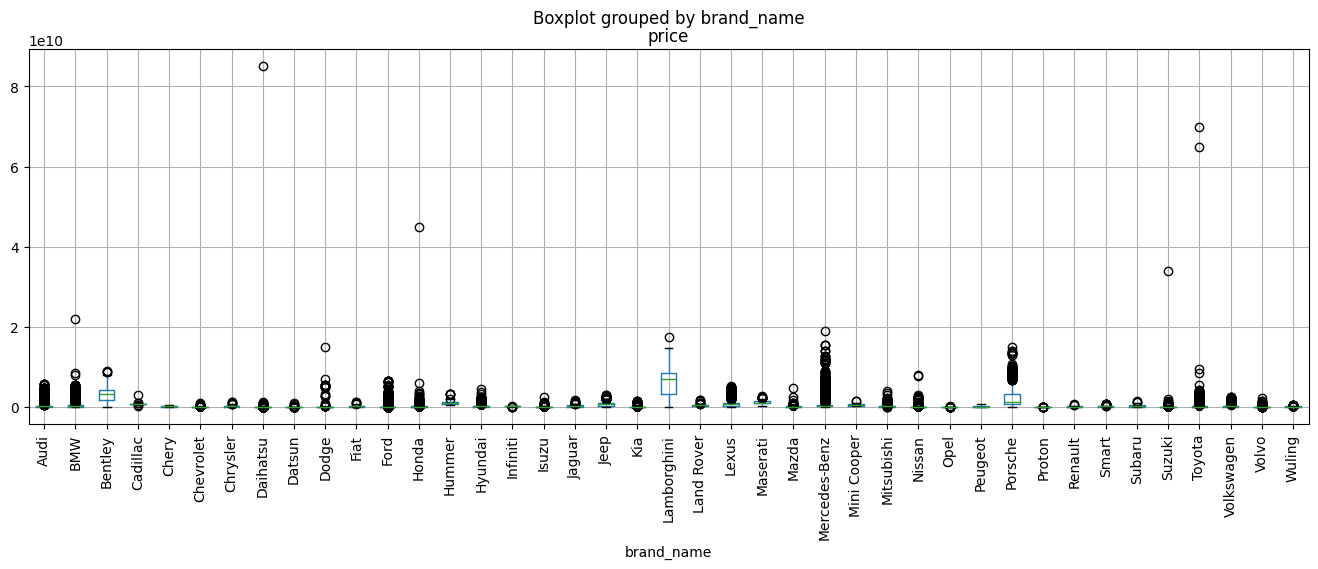

In [19]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','brand_name',ax=ax) # brand_name is the mirror value of brand column, it holds its original name
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# high price strangely related to BMW, Daihatsu, Honda, Suzuki, and toyota. Might be erorr in data enrty or scraping because these manufacturers are 
# not known for high end luxury or sporting cars

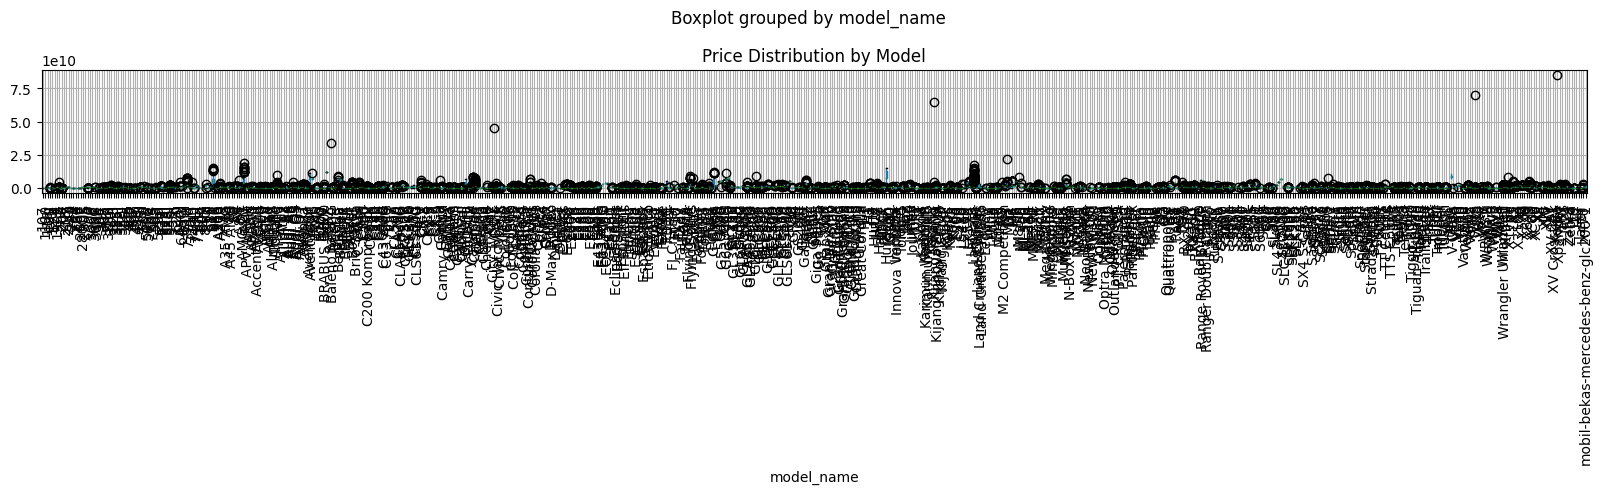

/tmp/ipykernel_54046/1138248915.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


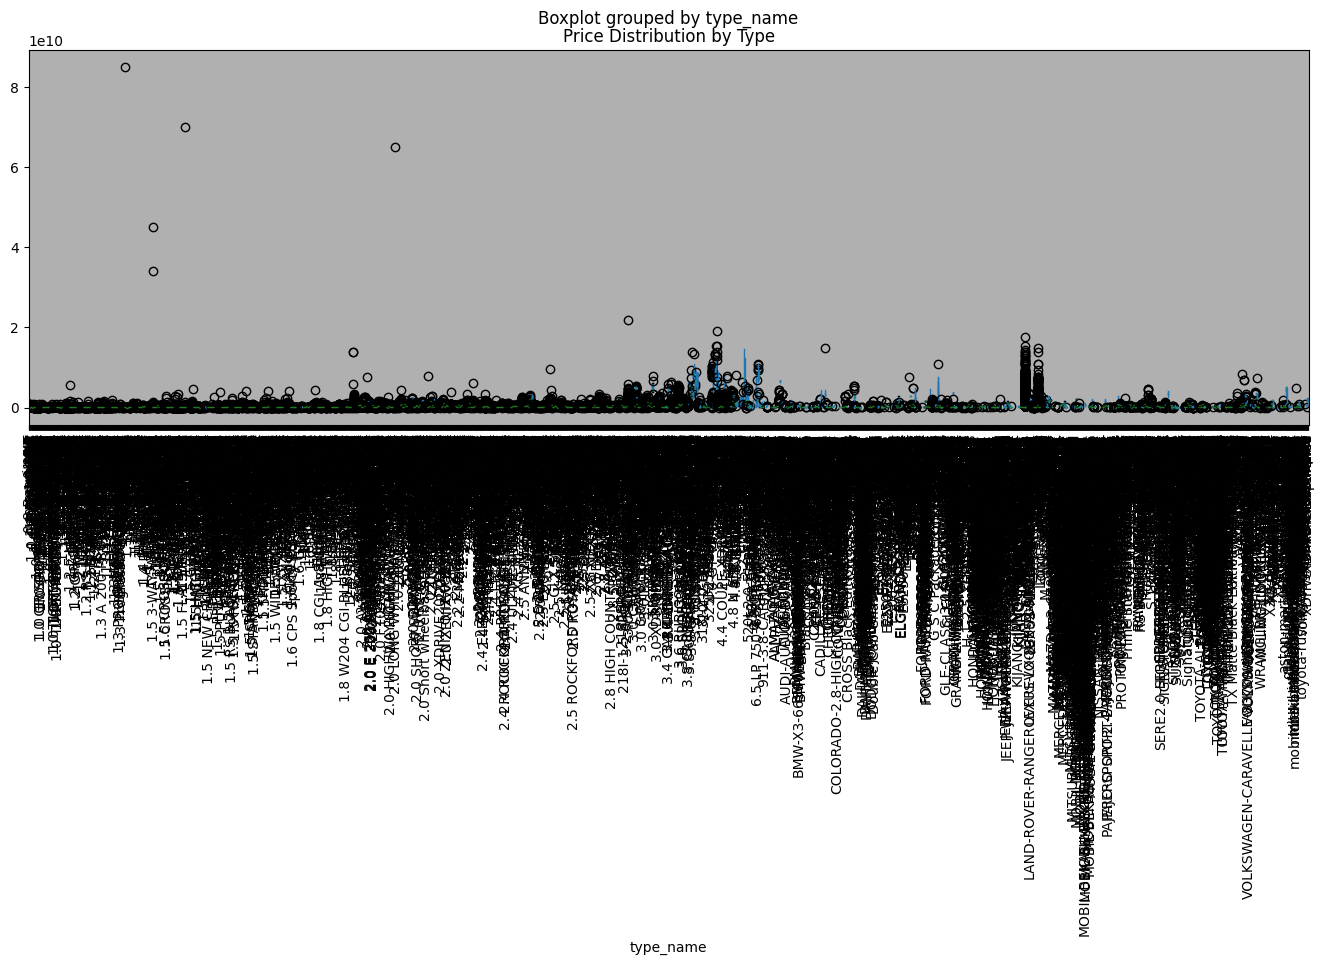

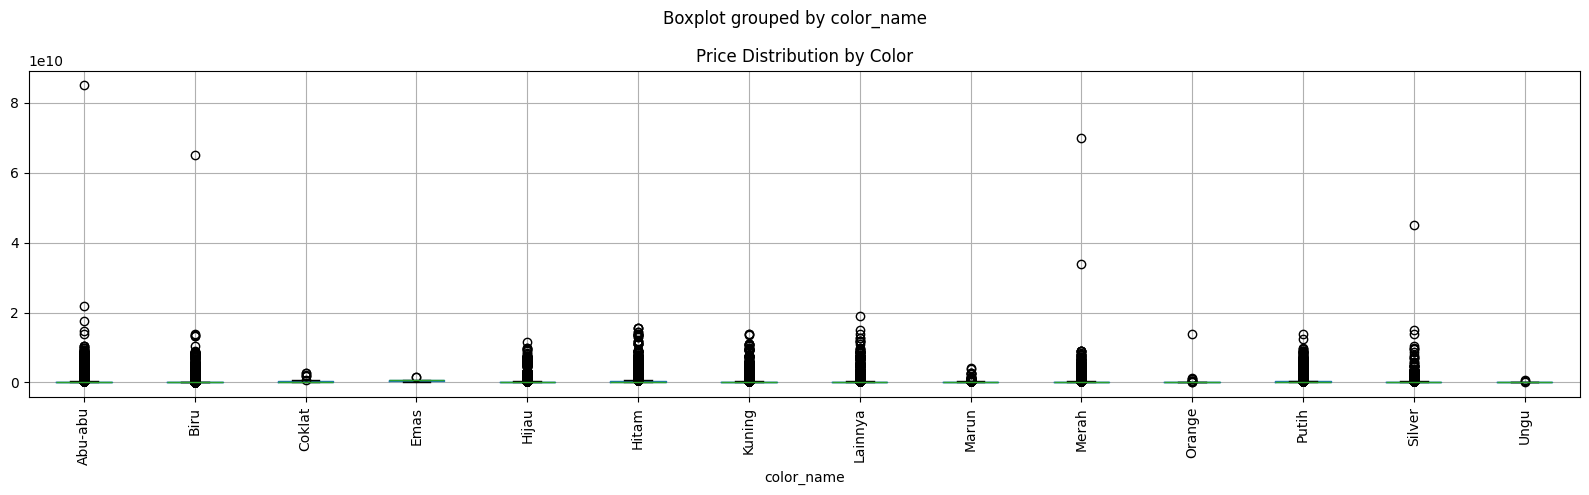

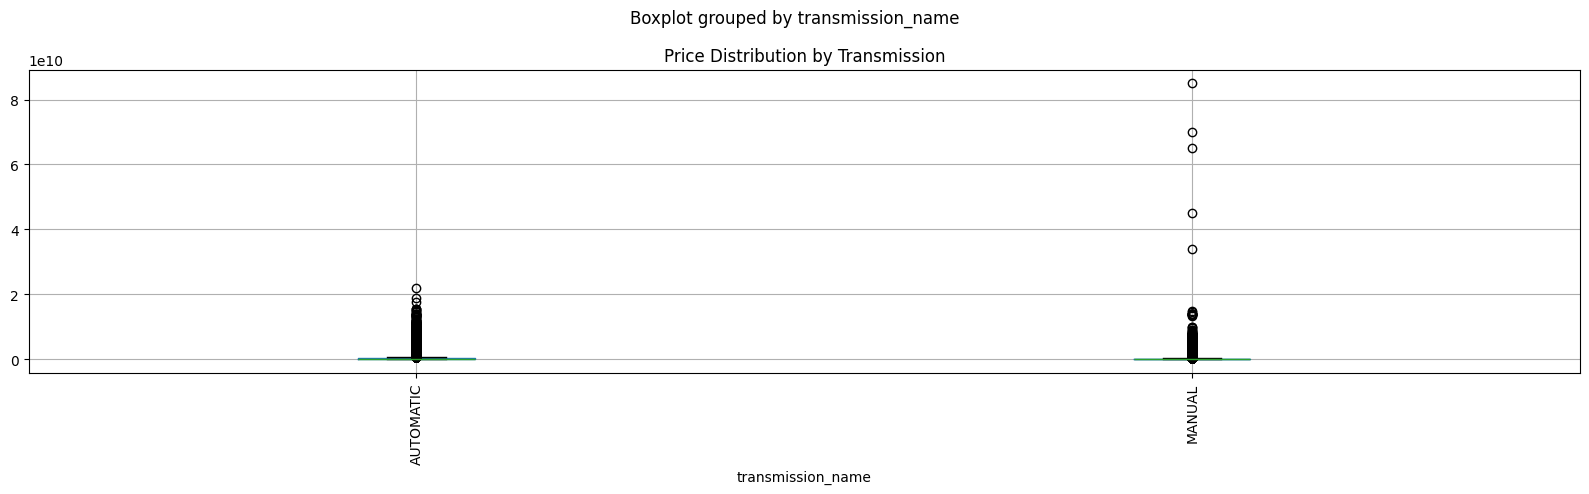

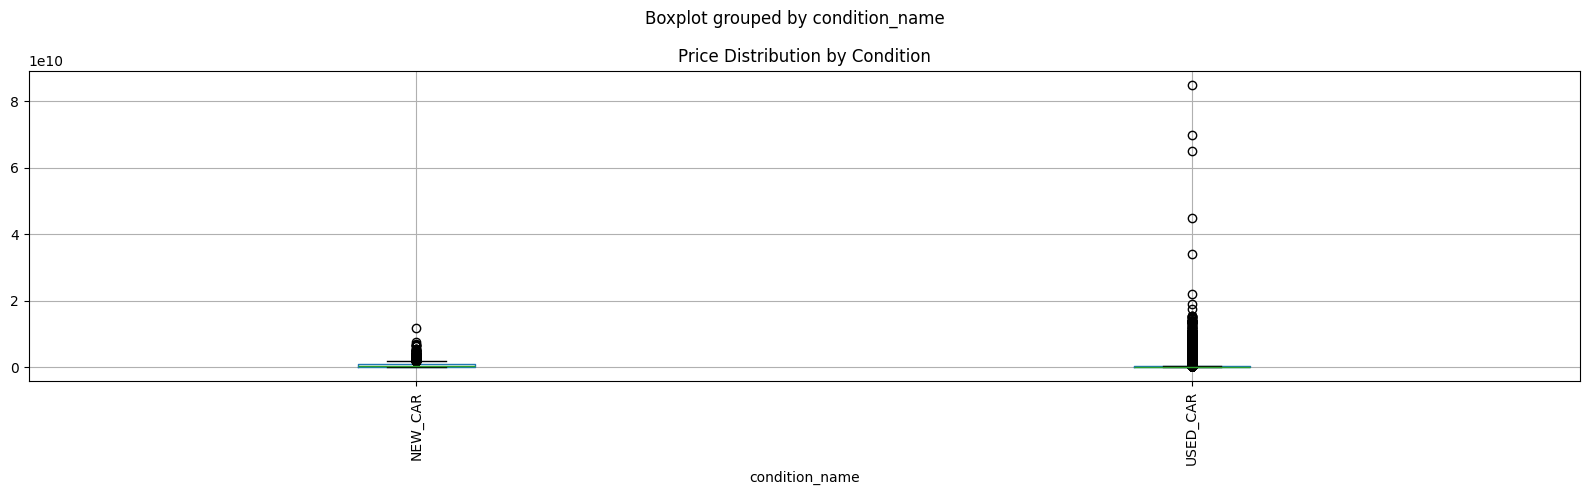

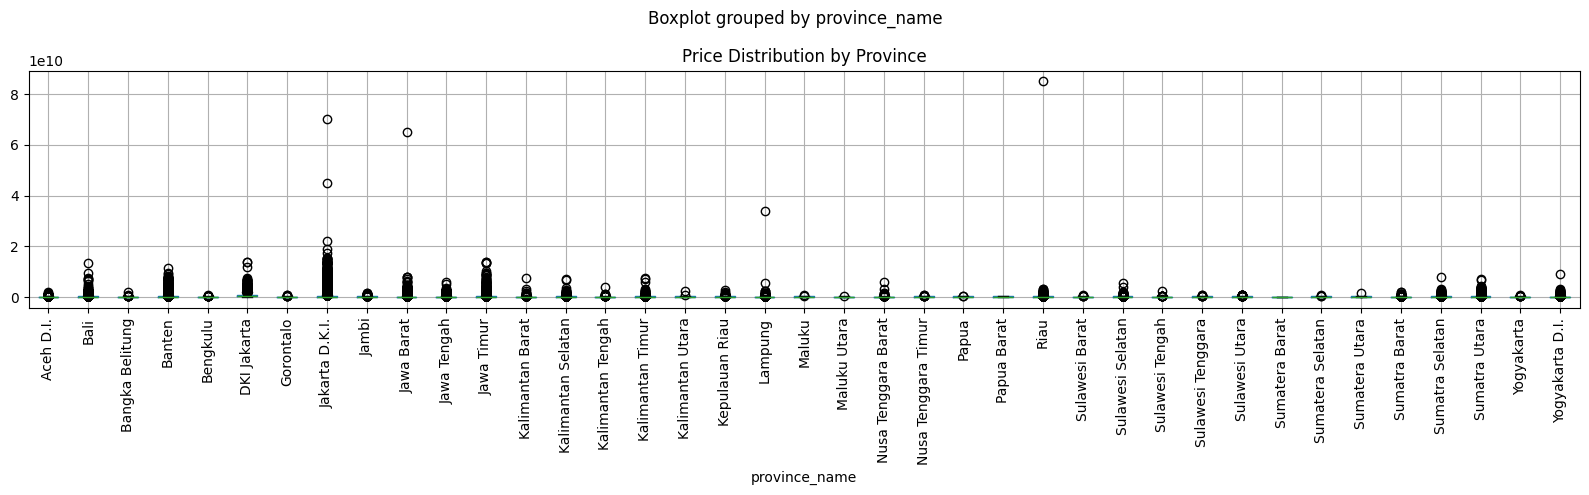

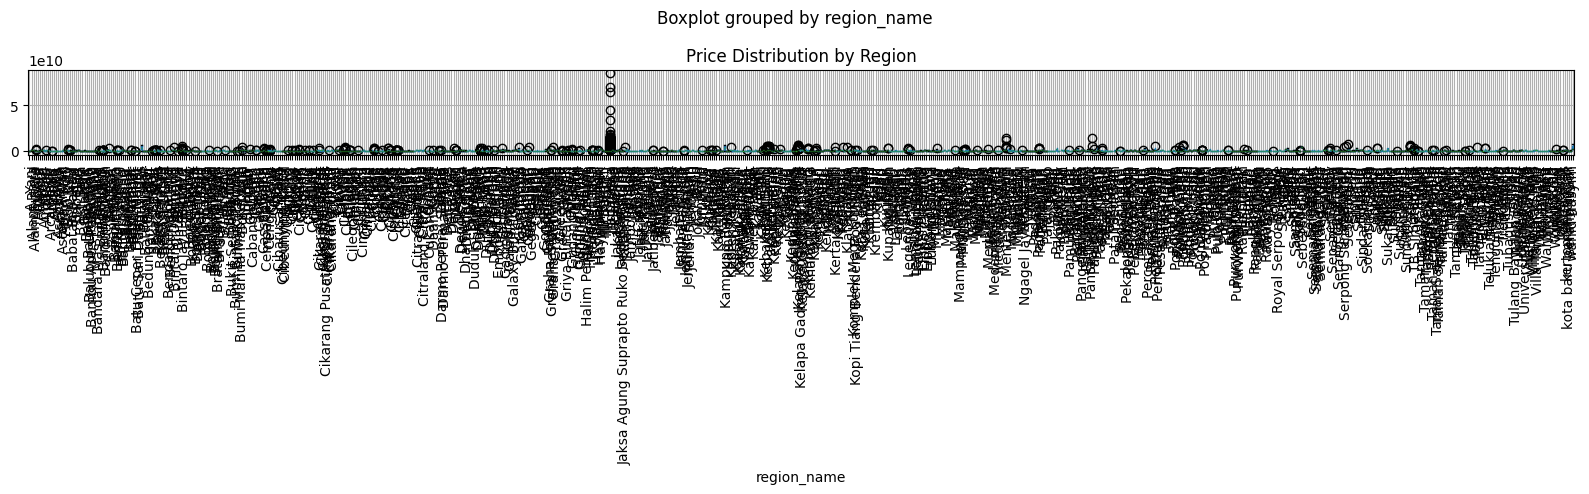

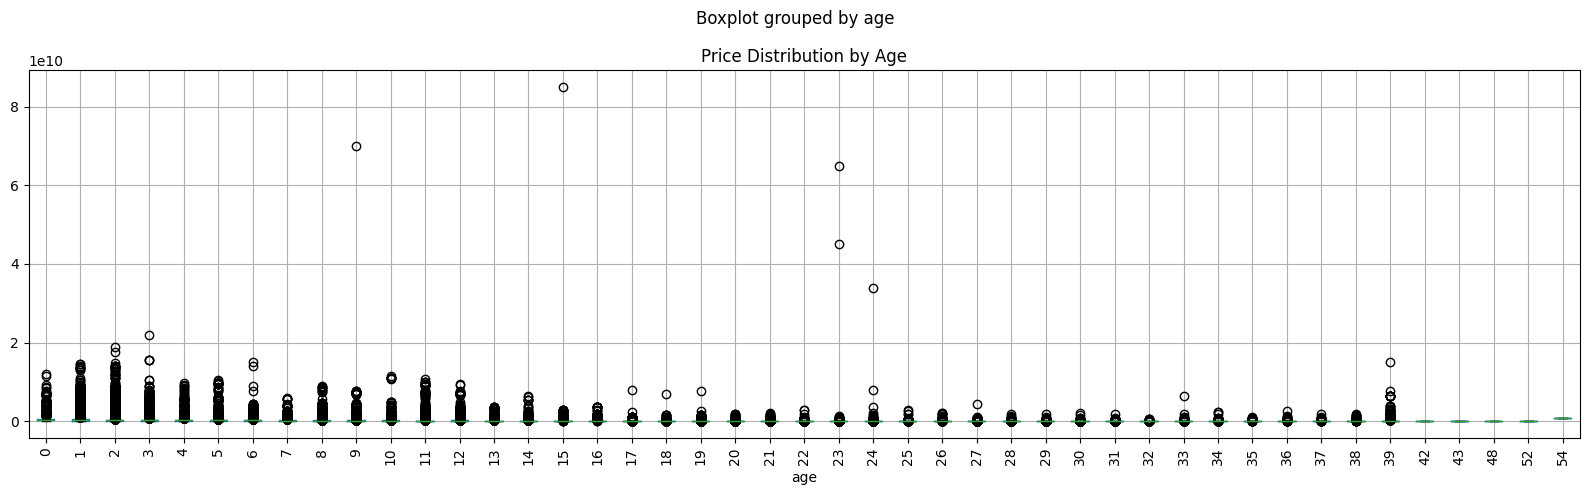

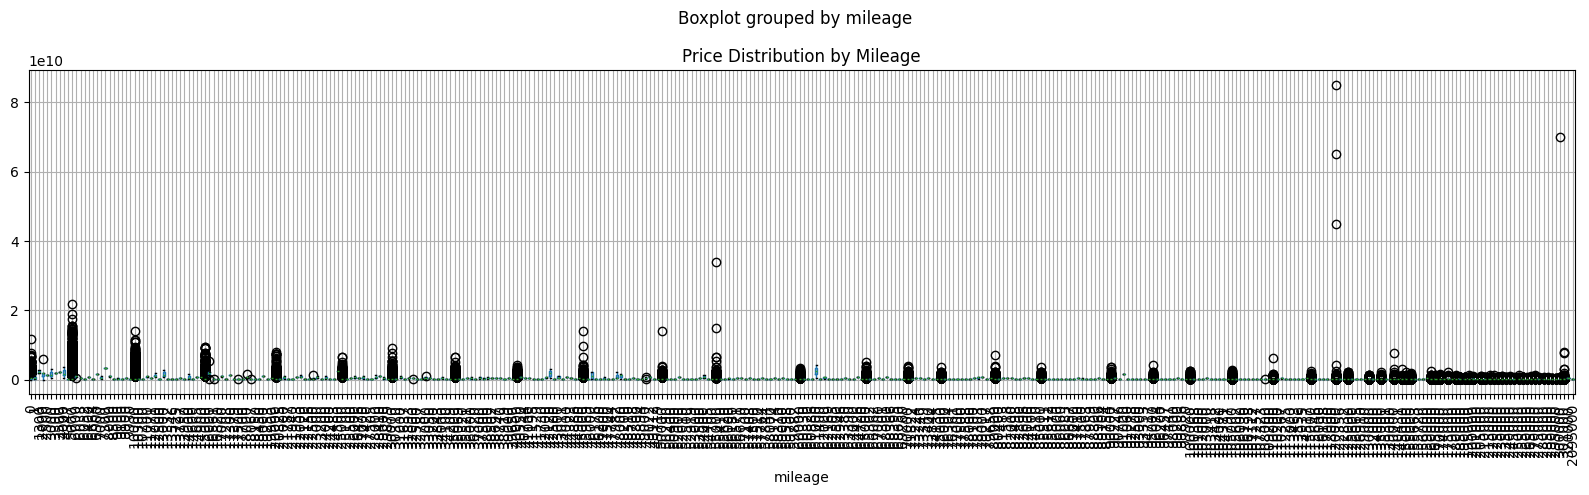

In [20]:
# 'brand' is already displayed previously
categorical_columns = ['model', 'type', 'color', 'transmission', 'condition', 'province', 'region']
numerical_columns = ['age', 'mileage']

for column in categorical_columns:
    fig, ax = plt.subplots(1, 1, figsize=(16, 5))
    df.boxplot('price', column + "_name", ax=ax)
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.title(f'Price Distribution by {column.capitalize()}')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

for column in numerical_columns:
    fig, ax = plt.subplots(1, 1, figsize=(16, 5))
    df.boxplot('price', column, ax=ax)
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.title(f'Price Distribution by {column.capitalize()}')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

### **Data Distribution**

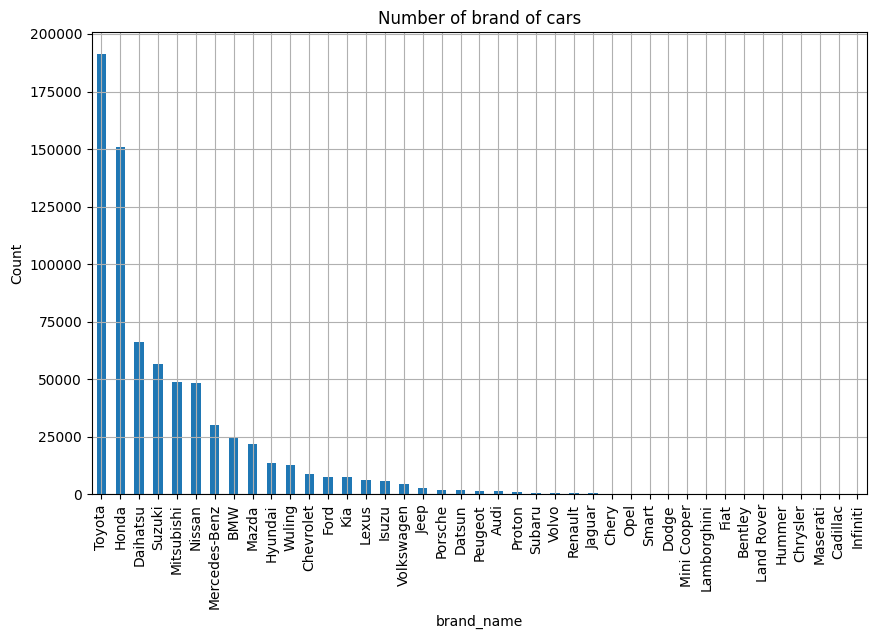

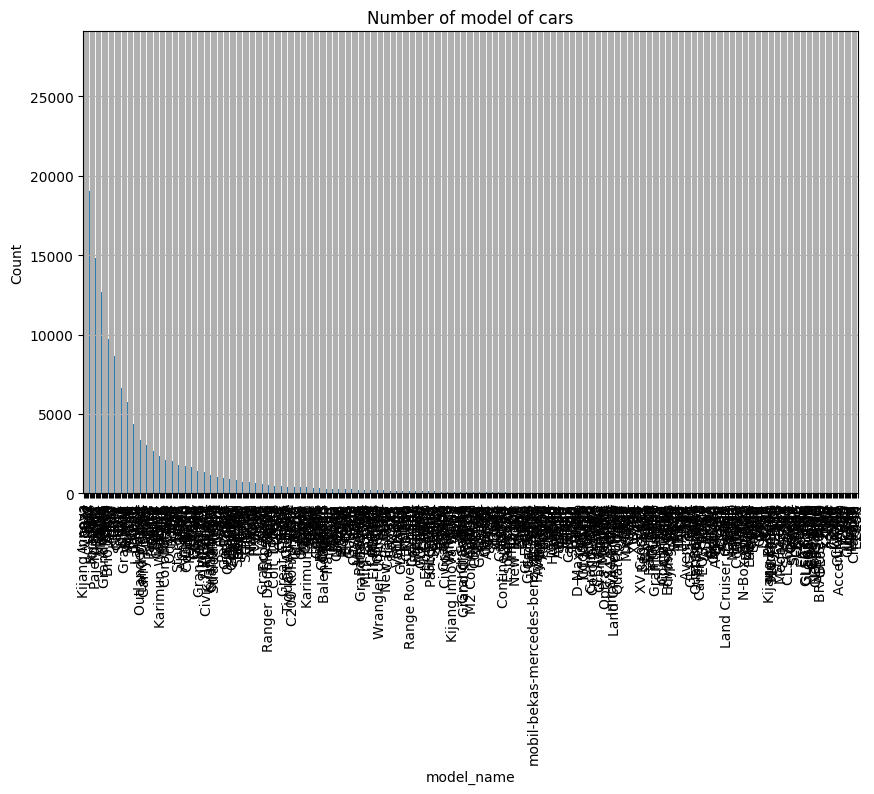

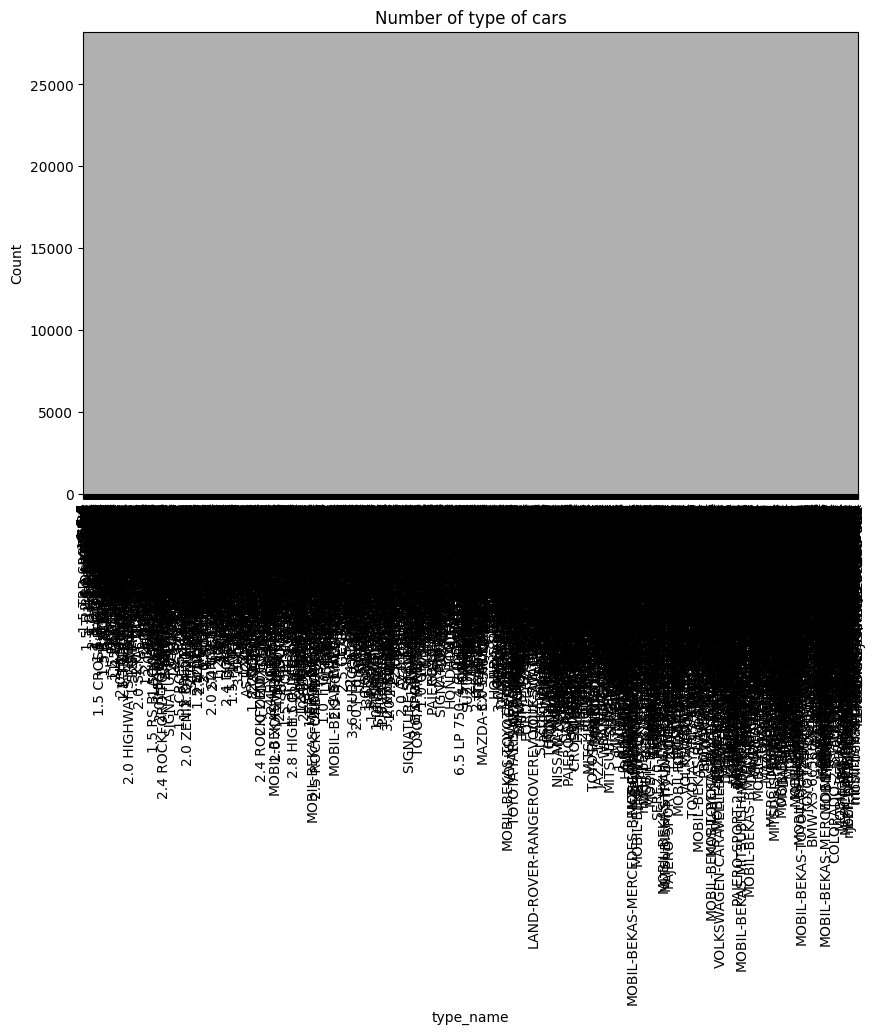

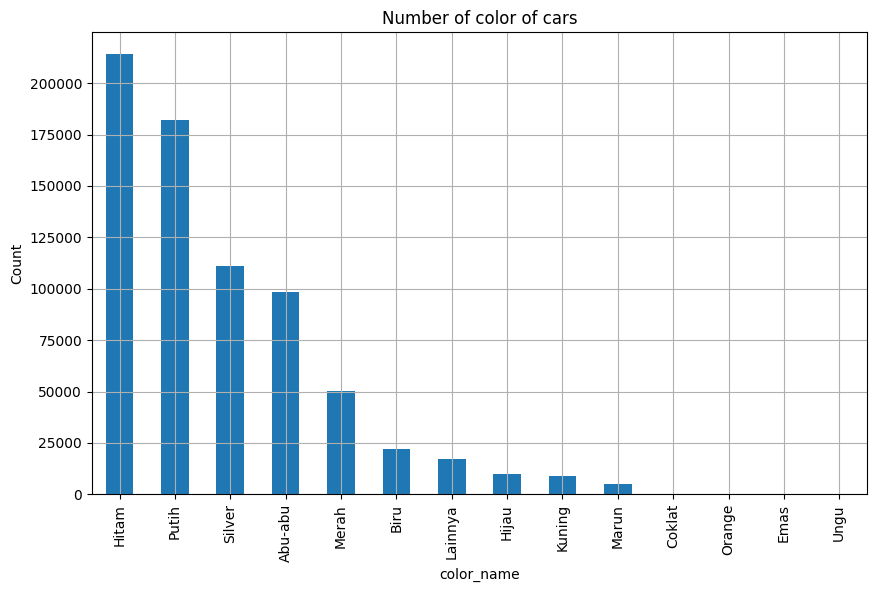

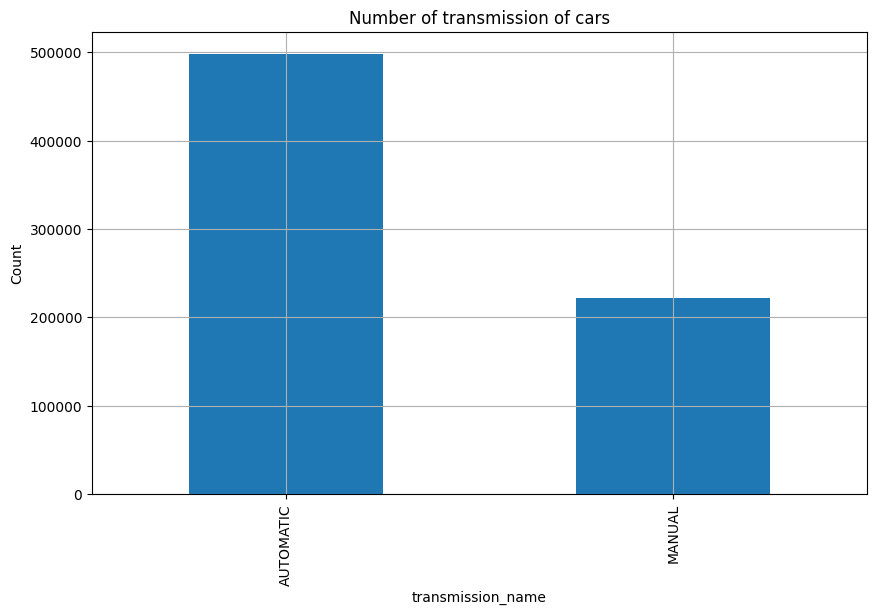

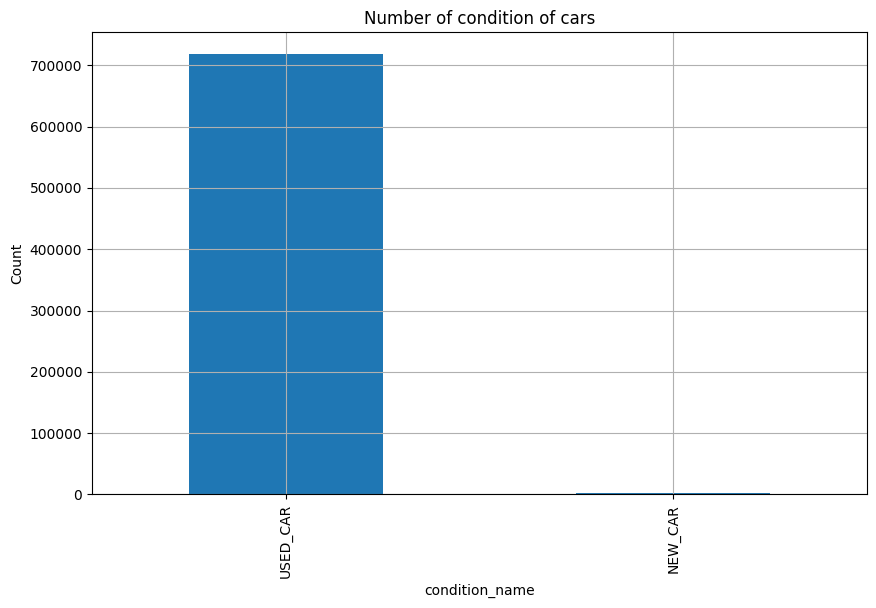

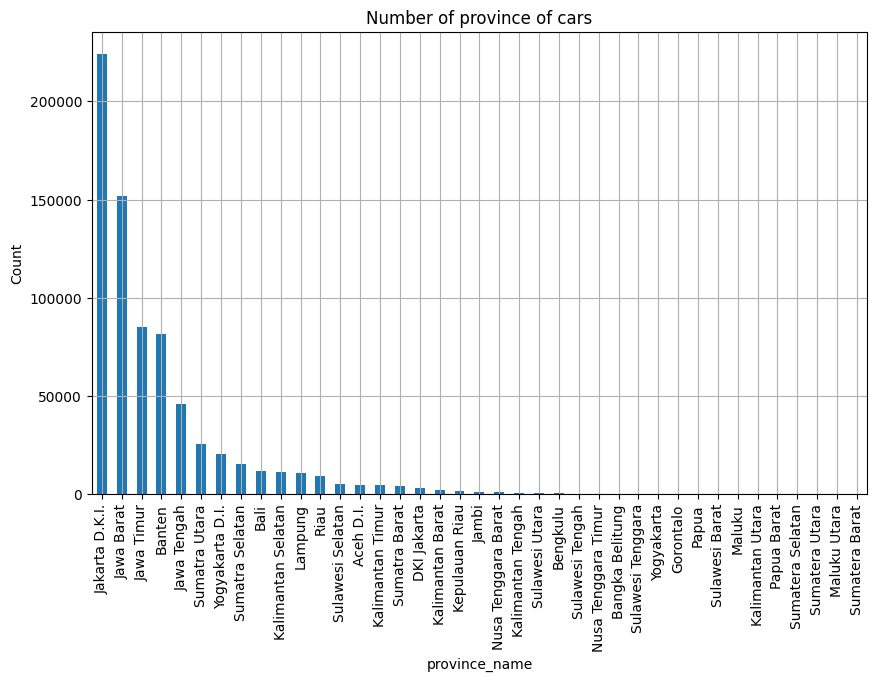

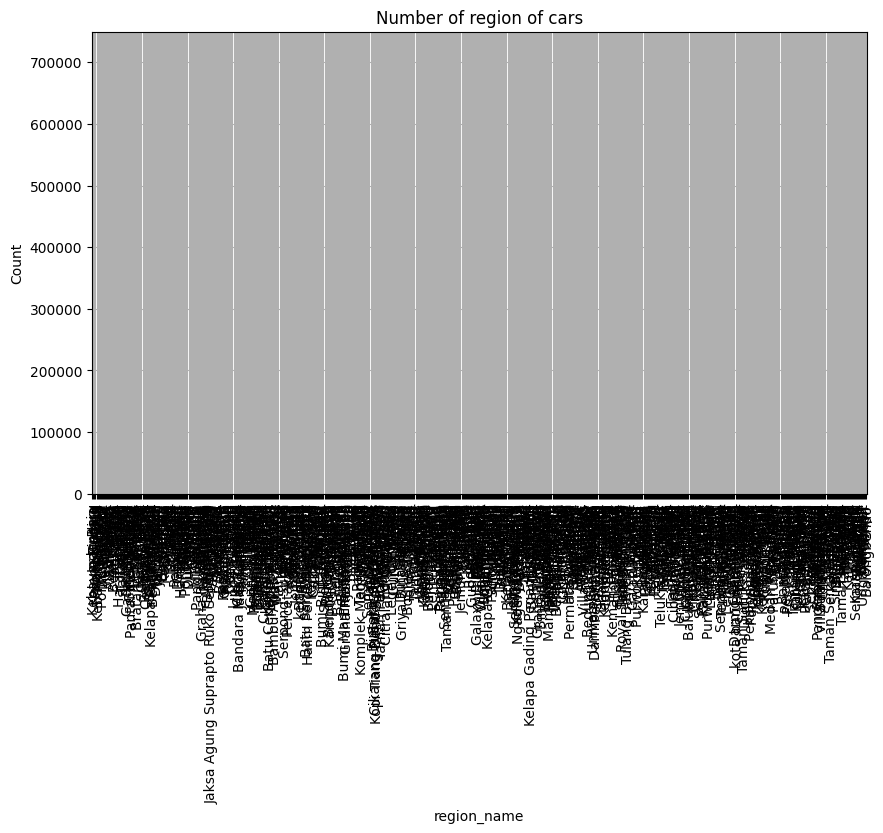

In [21]:
categorical_columns = ['brand', 'model', 'type', 'color', 'transmission', 'condition', 'province', 'region']
numerical_columns = ['age', 'mileage']

for column in categorical_columns:
    #check the number of cylinders of the listed used cars 
    fig,ax=plt.subplots(figsize=(10,6))
    df[column + "_name"].value_counts().sort_values(ascending=False).plot(kind='bar')
    plt.ylabel('Count')
    plt.title('Number of '+ column +' of cars')
    plt.grid(None)

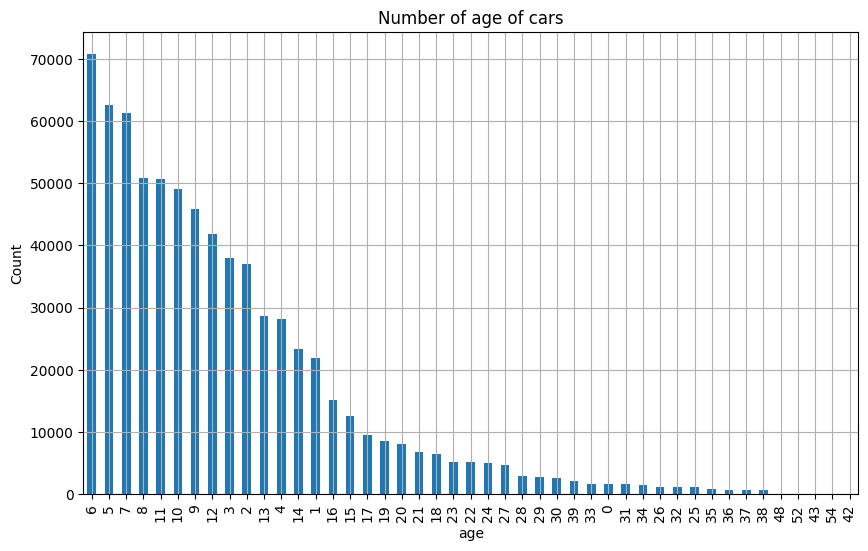

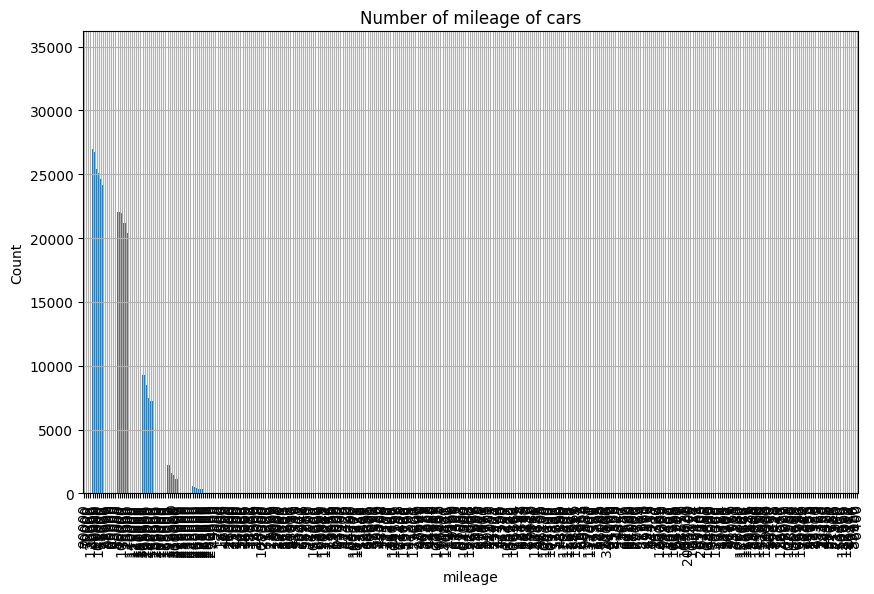

In [22]:
for column in numerical_columns:
    #check the number of cylinders of the listed used cars 
    fig,ax=plt.subplots(figsize=(10,6))
    df[column].value_counts().sort_values(ascending=False).plot(kind='bar')
    plt.ylabel('Count')
    plt.title('Number of '+ column +' of cars')
    plt.grid(None)